1. Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, посмотрите на описательную статистику. 

Вопрос: Сколько уникальных значений принимает переменная platform?

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
user_data = pd.read_csv('3_user_data.csv')
logs = pd.read_csv('3_logs.csv')

In [3]:
user_data.shape
logs.shape

(4500, 4)

In [5]:
user_data.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [6]:
logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

In [11]:
logs.platform.nunique()

3

In [12]:
user_data

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49
...,...,...,...
2949,19411,False,29
2950,61579,False,50
2951,61221,True,64
2952,29863,False,46


In [8]:
logs

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
...,...,...,...,...
4495,64496,False,computer,1585459072
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121
4498,52880,False,phone,1585455362


2. Какой клиент совершил больше всего успешных операций?

Если несколько пользователей совершили одинаковое число успешных действий, перечислите их идентификаторы (client) через запятую и пробел в порядке возрастания. 

In [18]:
success_user = logs.groupby('client').agg({'success': 'sum'}).sort_values('success')
success_user = success_user.query('success == 41').sort_values('client')
success_user

,success
client,
12179,41
28719,41
36165,41
52870,41
61468,41
61473,41
78349,41
82563,41
92584,41


3. С какой платформы осуществляется наибольшее количество успешных операций?

In [11]:
platforms = logs.groupby('platform').agg({'success': 'sum'}).sort_values('success')
platforms

,success
platform,
tablet,180
computer,1090
phone,2019


4. Какая платформа наиболее популярна среди премиумных клиентов?

In [26]:
us_da_lo = user_data.merge(logs, on='client')

platforms = us_da_lo[us_da_lo['premium'] == True]\
    .groupby('platform')\
    .agg({'success': 'sum'})\
    .sort_values('success')

platforms

,success
platform,
tablet,18
computer,108
phone,177


5. Визуализируйте распределение возраста клиентов в зависимости от типа клиента (обычный или премиум), используя библиотеку seaborn с параметрами цвета по умолчанию. 

In [29]:
premium = us_da_lo.query('premium == True')
no_premium = us_da_lo.query('premium != True')

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


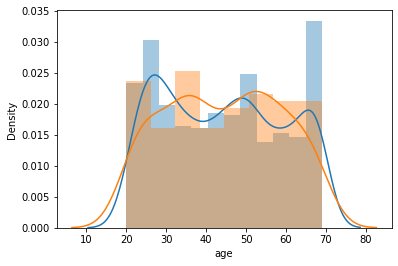

In [33]:
sns.distplot(no_premium.age)
sns.distplot(premium.age)

6. Постройте график распределения числа успешных операций: 

x – число успешных операций
y – число клиентов, совершивших столько успешных операций

In [44]:
success = us_da_lo[us_da_lo['success'] == True]\
        .client.value_counts()\
        .reset_index()\
        .client.value_counts()\
        .reset_index()\
        .rename(columns={'index': 'number_of_success_op', 'client':'number_of_clients'})

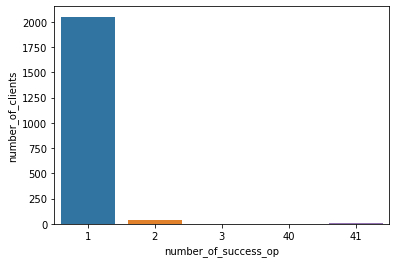

In [46]:
sns.barplot(data=success, x='number_of_success_op', y='number_of_clients')